In [580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import datetime

#**DATA LOADING AND INSPECTION**

In [581]:
df = pd.read_csv('Data/onlineRetail.csv', encoding='ISO-8859-1', parse_dates=['InvoiceDate'])

In [582]:
print(f'This data has {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

This data has 541909 rows and 8 columns.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [583]:
# cols = df.columns
# cols

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [585]:
numericalColumns = ['Quantity','UnitPrice']
df[numericalColumns].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


#**DATA CLEANING AND PREPROCESSING**

In [ ]:
dfCleaned = df.copy()
print("\nMissing values:")
print(dfCleaned.isnull().sum())


Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


since CustomerID are must for out segmentation in order to indentify the customers, so we have to remove the missing CustomerID rows.  
while missing Description is okay for us as we are not currently focusing on description based segmentation, so we will fill 'nan' there.

In [587]:
dfCleaned['Description'] = dfCleaned['Description'].fillna('nan')
dfCleaned.dropna(subset = ['CustomerID'], inplace = True)
dfCleaned.reset_index(inplace = True,drop = True)
dfCleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [588]:
dfCleaned.duplicated().sum()

np.int64(5225)

In [589]:
dfCleaned.drop_duplicates(inplace = True)
dfCleaned.reset_index(inplace = True,drop = True)
dfCleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


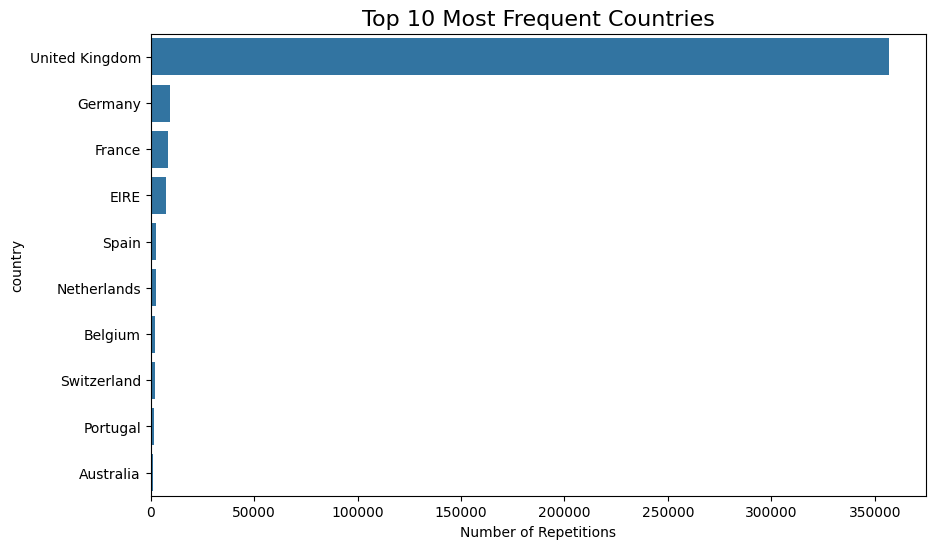

In [590]:
countryCount = dfCleaned.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=countryCount.values, y=countryCount.index)
plt.title("Top 10 Most Frequent Countries", fontsize=16)
plt.xlabel("Number of Repetitions")
plt.ylabel("country")
plt.show()

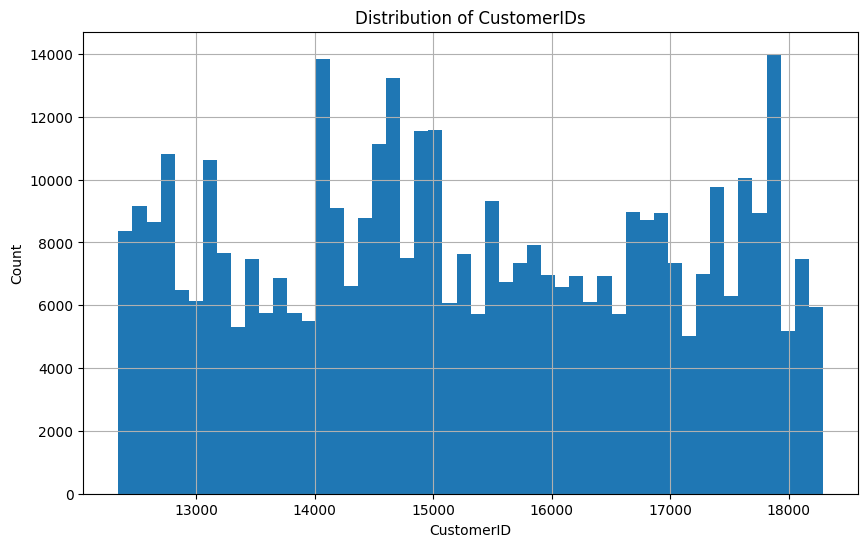

In [591]:
plt.figure(figsize=(10, 6))
dfCleaned['CustomerID'].hist(bins=50)
plt.title('Distribution of CustomerIDs')
plt.xlabel('CustomerID')
plt.ylabel('Count')
plt.show()

#**LABEL ENCODING FOR CATEGORICAL COLUMNS**

In [592]:
new_df = df.copy()

In [593]:
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','Country']

for category in categories:
    
        new_df[category] = le.fit_transform(new_df[category].astype(str))
        
        
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3536,3918,6,0,2.55,17850.0,36
1,0,2794,3926,6,0,3.39,17850.0,36
2,0,3044,913,8,0,2.75,17850.0,36
3,0,2985,1910,6,0,3.39,17850.0,36
4,0,2984,2911,6,0,3.39,17850.0,36
...,...,...,...,...,...,...,...,...
541904,22060,1527,2379,12,23259,0.85,12680.0,13
541905,22060,1803,743,6,23259,2.10,12680.0,13
541906,22060,2145,749,4,23259,4.15,12680.0,13
541907,22060,2146,748,4,23259,4.15,12680.0,13


In [594]:
new_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,406829.000000,541909.000000
mean,11648.523427,1650.693107,2136.101783,9.552250,12164.309502,4.611114,15287.690570,34.259772
std,6730.300232,932.806239,1148.780307,218.081158,6971.111557,96.759853,1713.600303,6.222861
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,-11062.060000,12346.000000,0.000000
25%,5553.000000,966.000000,1209.000000,1.000000,5895.000000,1.250000,13953.000000,36.000000
50%,11967.000000,1563.000000,2101.000000,3.000000,12565.000000,2.080000,15152.000000,36.000000
75%,17484.000000,2174.000000,3129.000000,10.000000,18344.000000,4.130000,16791.000000,36.000000
max,25899.000000,4069.000000,4223.000000,80995.000000,23259.000000,38970.000000,18287.000000,37.000000


#**FEATURE ENGINEERING**

**HANDLING OUTLIERS**

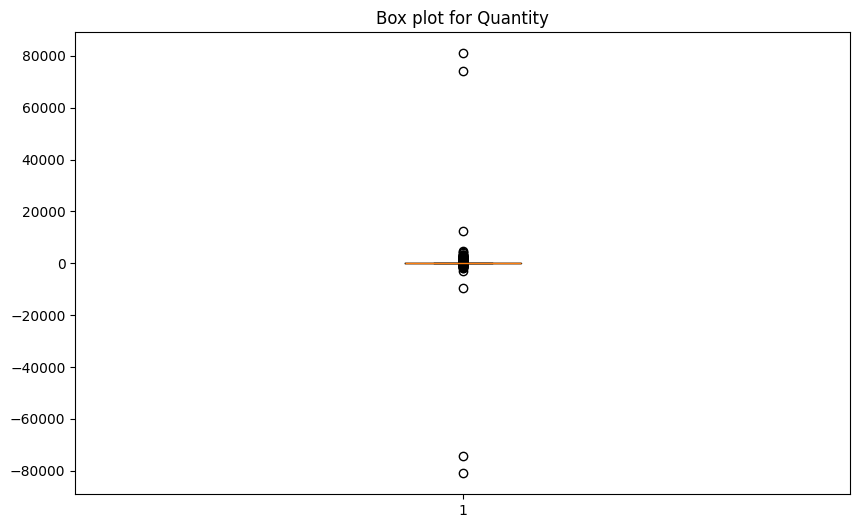

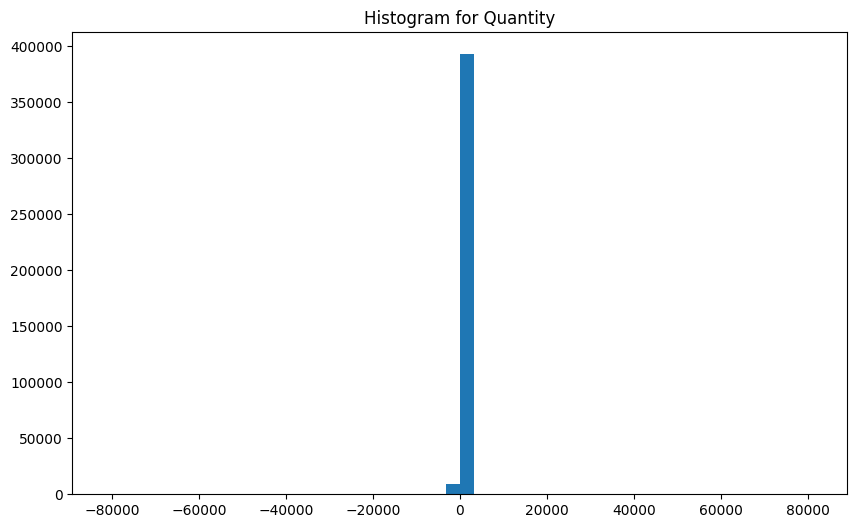

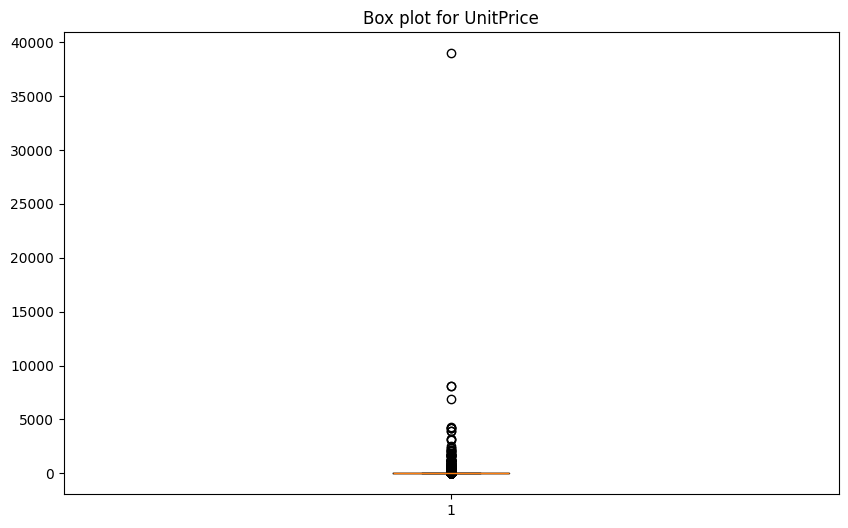

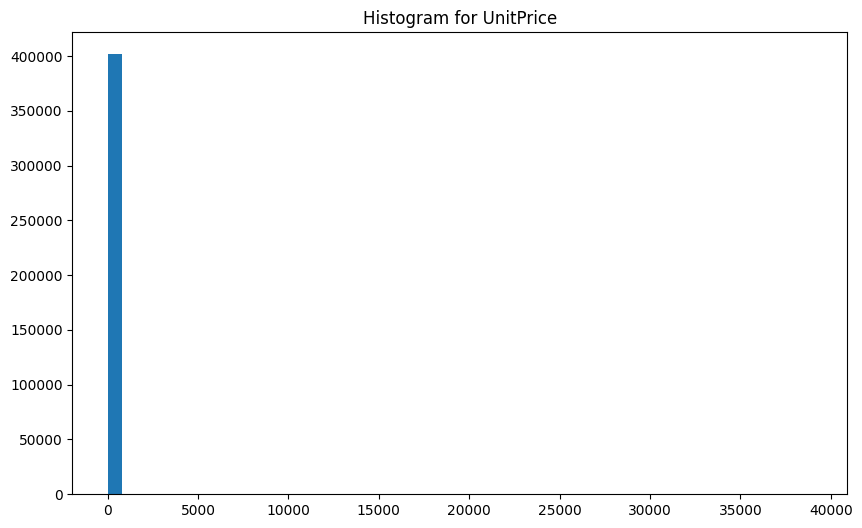

In [595]:
# Box plot for Quantity
plt.figure(figsize=(10, 6))
plt.boxplot(dfCleaned['Quantity'])
plt.title('Box plot for Quantity')
plt.show()

# Histogram for Quantity
plt.figure(figsize=(10, 6))
plt.hist(dfCleaned['Quantity'], bins=50)
plt.title('Histogram for Quantity')
plt.show()

# Box plot for UnitPrice
plt.figure(figsize=(10, 6))
plt.boxplot(dfCleaned['UnitPrice'])
plt.title('Box plot for UnitPrice')
plt.show()

# Histogram for UnitPrice
plt.figure(figsize=(10, 6))
plt.hist(dfCleaned['UnitPrice'], bins=50)
plt.title('Histogram for UnitPrice')
plt.show()


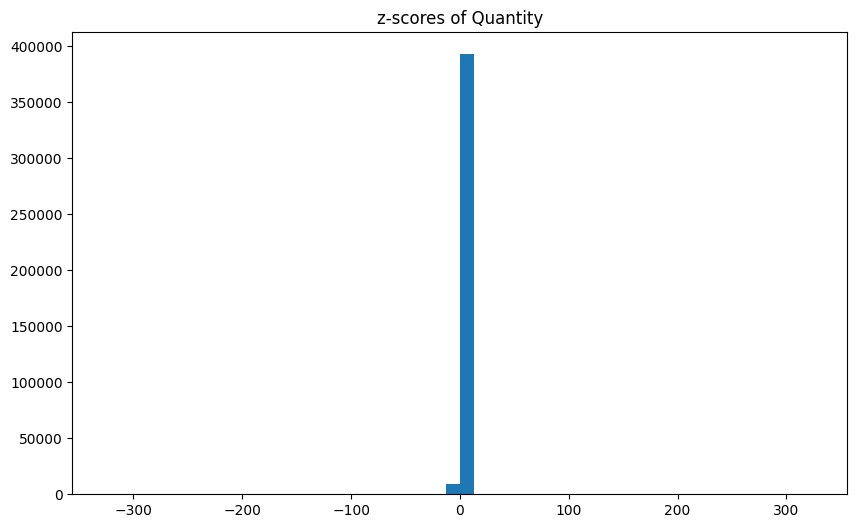

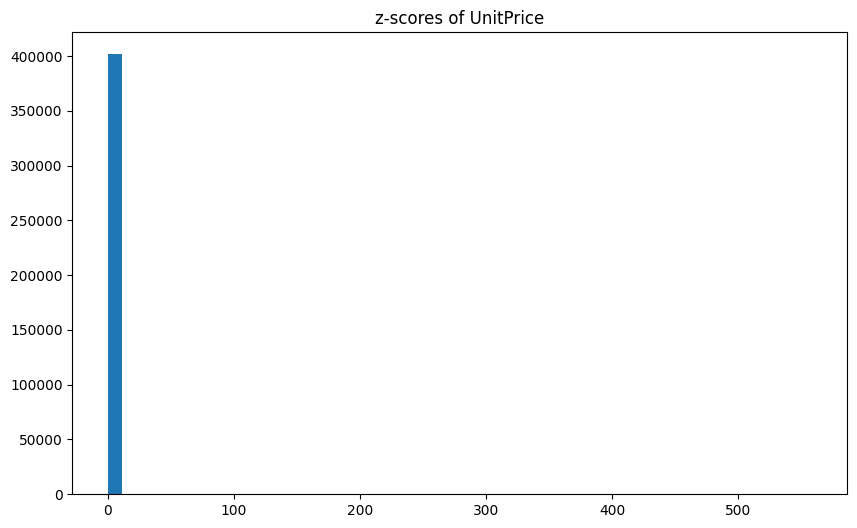

In [596]:
# z-scores of Quantity
plt.figure(figsize=(10, 6))
plt.hist((dfCleaned['Quantity'] - dfCleaned['Quantity'].mean()) / dfCleaned['Quantity'].std(), bins=50)
plt.title('z-scores of Quantity')
plt.show()

# z-scores of UnitPrice
plt.figure(figsize=(10, 6))
plt.hist((dfCleaned['UnitPrice'] - dfCleaned['UnitPrice'].mean()) / dfCleaned['UnitPrice'].std(), bins=50)
plt.title('z-scores of UnitPrice')
plt.show()

In [597]:
dfCleaned[numericalColumns].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [598]:
dfCleaned = dfCleaned.loc[(dfCleaned["UnitPrice"] > 0)]
dfCleaned = dfCleaned.reset_index(drop=True)
dfCleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401559,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
401560,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
401561,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401562,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [599]:
dfCleaned[numericalColumns].describe()

,Quantity,UnitPrice
count,401564.000000,401564.000000
mean,12.149911,3.474410
std,249.512649,69.767501
min,-80995.000000,0.001000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [600]:
dfCleaned = dfCleaned.loc[(dfCleaned["Quantity"] > 0)]
dfCleaned = dfCleaned.reset_index(drop=True)
dfCleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [601]:
dfCleaned[numericalColumns].describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


**Checking the outlier handling**

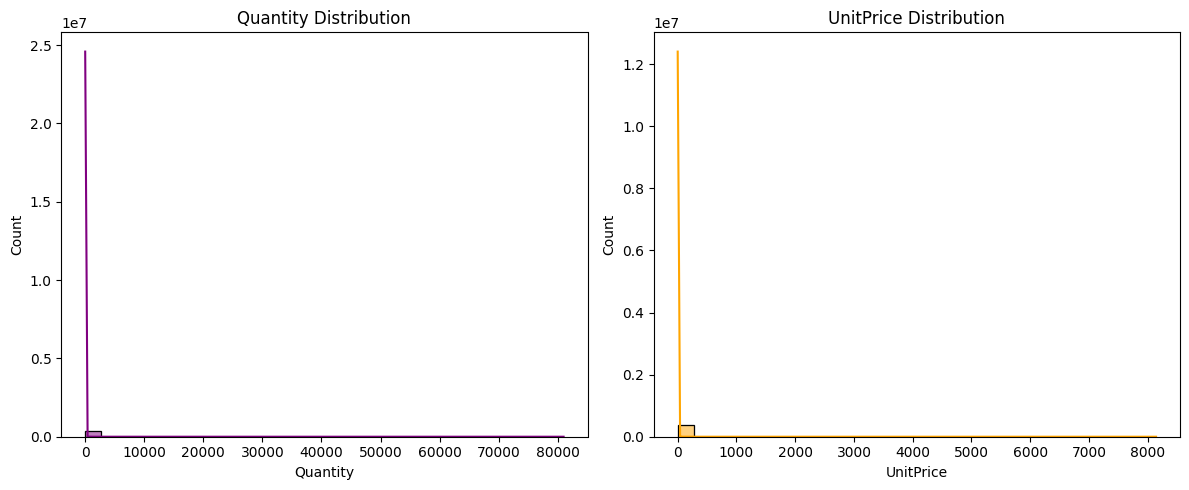

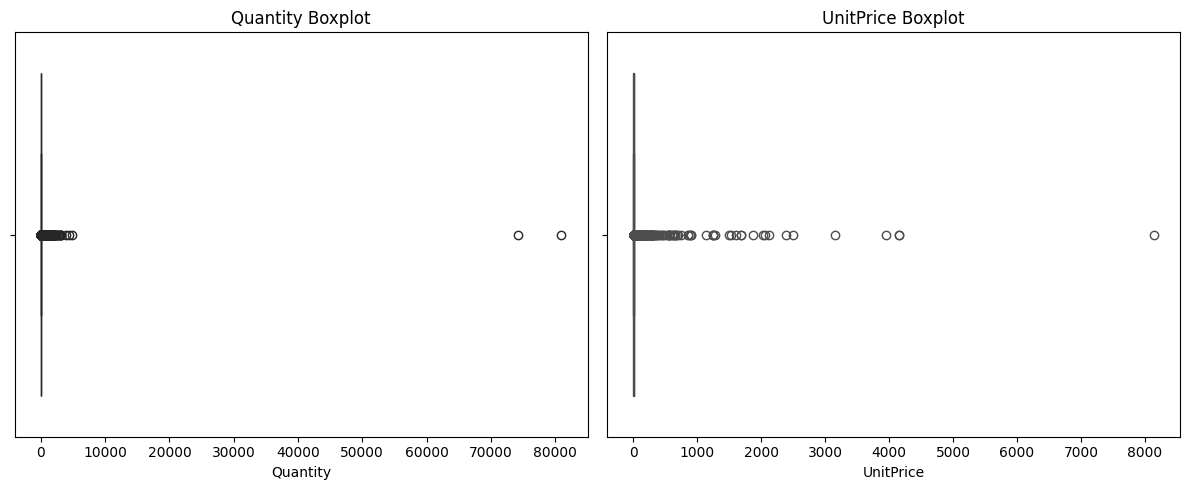

Skewness of Quantity: 407.3456626876272
Skewness of UnitPrice: 202.74086107358727
Remaining outliers after cleaning:
Quantity     25616
UnitPrice    34112
dtype: int64


In [ ]:
plt.figure(figsize=(12, 5))

# Quantity Distribution
plt.subplot(1, 2, 1)
sns.histplot(dfCleaned['Quantity'], kde=True, bins=30, color='purple')
plt.title('Quantity Distribution')

# UnitPrice Distribution
plt.subplot(1, 2, 2)
sns.histplot(dfCleaned['UnitPrice'], kde=True, bins=30, color='orange')
plt.title('UnitPrice Distribution')

plt.tight_layout()
plt.show()

# Boxplots to visualize any remaining outliers for 'Quantity' and 'UnitPrice'
plt.figure(figsize=(12, 5))

# Quantity Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=dfCleaned['Quantity'], color='purple')
plt.title('Quantity Boxplot')

# UnitPrice Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=dfCleaned['UnitPrice'], color='orange')
plt.title('UnitPrice Boxplot')

plt.tight_layout()
plt.show()


#Check skewness to ensure outliers are handled
quantity_skewness = dfCleaned['Quantity'].skew()
unitprice_skewness = dfCleaned['UnitPrice'].skew()

print(f"Skewness of Quantity: {quantity_skewness}")
print(f"Skewness of UnitPrice: {unitprice_skewness}")


Q1 = dfCleaned[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = dfCleaned[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

aligned_df, aligned_Q1 = dfCleaned[['Quantity', 'UnitPrice']].align(Q1, axis=1)
aligned_df, aligned_Q3 = dfCleaned[['Quantity', 'UnitPrice']].align(Q3, axis=1)

# Remaining outliers after cleaning
remaining_outliers = ((aligned_df < (aligned_Q1 - 1.5 * IQR)) | (aligned_df > (aligned_Q3 + 1.5 * IQR))).sum()

print("Remaining outliers after cleaning:")
print(remaining_outliers)

**RFM FEATURE**

In [603]:
unique_customers = dfCleaned['CustomerID'].nunique()
print(f"Number of unique CustomerIDs: {unique_customers}")

Number of unique CustomerIDs: 4338


In [604]:
dfCleaned['InvoiceDate'] = pd.to_datetime(dfCleaned['InvoiceDate'])

dfCleaned['TotalPrice'] = dfCleaned['Quantity'] * dfCleaned['UnitPrice']

snapshot_date = dfCleaned['InvoiceDate'].max() + pd.Timedelta(days=1)  # Day after the last invoice date
recency = dfCleaned.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days})

frequency = dfCleaned.groupby('CustomerID').agg({'InvoiceNo': 'nunique'})

# Monetary: Sum the total spending for each customer
monetary = dfCleaned.groupby('CustomerID').agg({'TotalPrice': 'sum'})

rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

rfm.columns = ['Recency', 'Frequency', 'Monetary']

print(rfm)

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40
...             ...        ...       ...
18280.0         278          1    180.60
18281.0         181          1     80.82
18282.0           8          2    178.05
18283.0           4         16   2045.53
18287.0          43          3   1837.28

[4338 rows x 3 columns]


In [605]:
print(rfm.describe())

           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2048.688081
std     100.014169     7.697998    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     306.482500
50%      51.000000     2.000000     668.570000
75%     142.000000     5.000000    1660.597500
max     374.000000   209.000000  280206.020000


#**EXPLORATORY DATA ANALYSIS (EDA)**

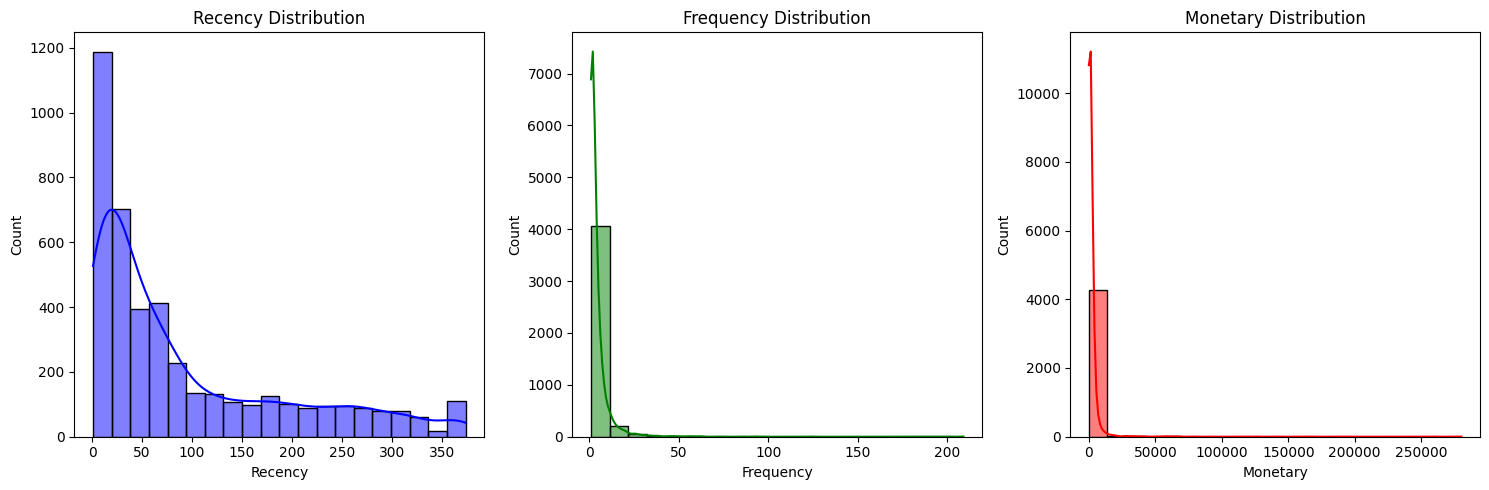

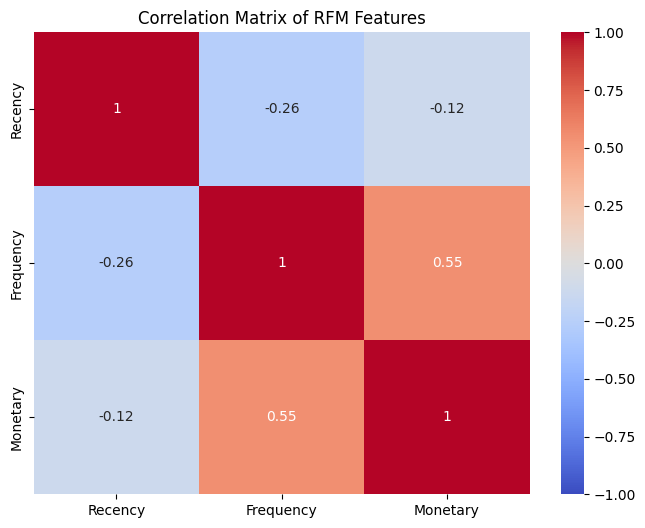

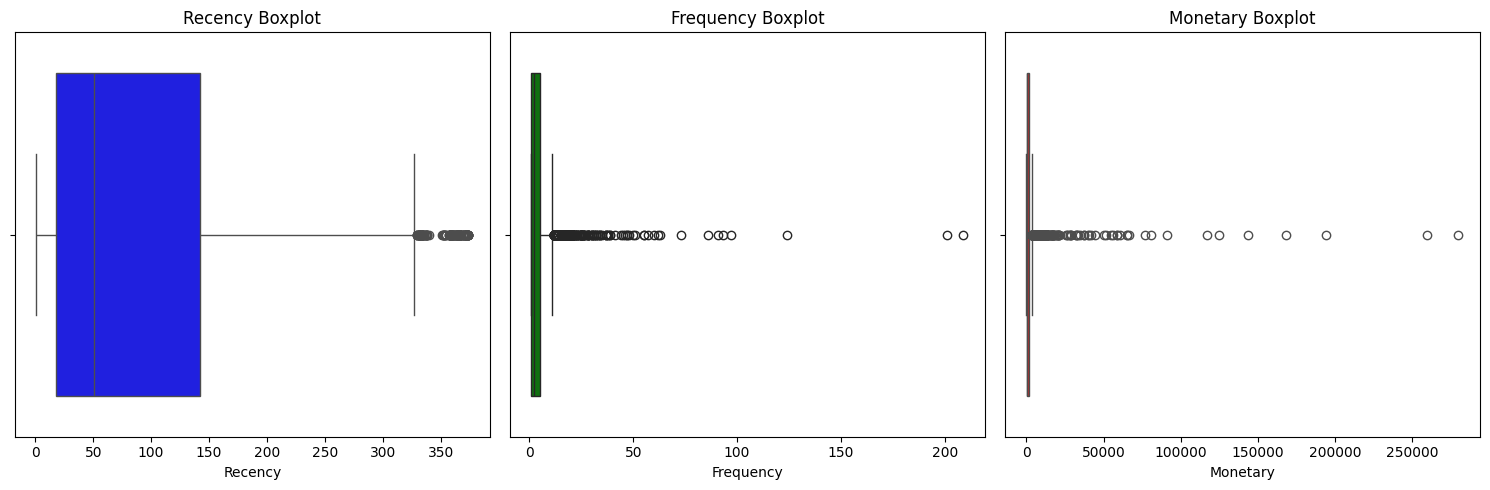

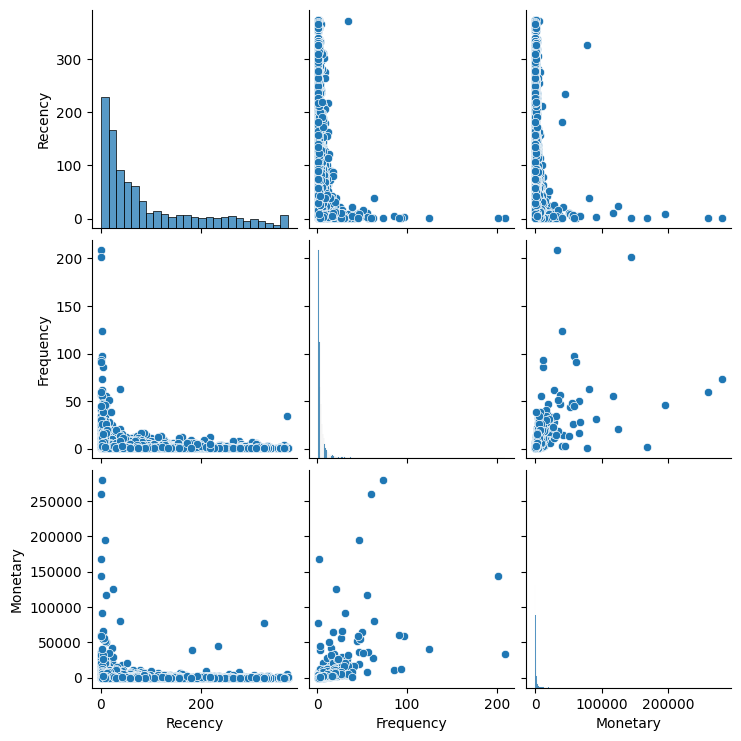

In [606]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True, bins=20, color='blue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True, bins=20, color='green')
plt.title('Frequency Distribution')

# Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True, bins=20, color='red')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of RFM Features')
plt.show()

# Boxplots to identify potential outliers in RFM values
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=rfm['Recency'], color='blue')
plt.title('Recency Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(x=rfm['Frequency'], color='green')
plt.title('Frequency Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(x=rfm['Monetary'], color='red')
plt.title('Monetary Boxplot')

plt.tight_layout()
plt.show()

# Pairplot to visualize the relationship between RFM variables
sns.pairplot(rfm)
plt.show()


**NORMALIZATION**

we initially tried StandardScaler normalization, but the resulting clusters were not satisfactory  
 so we chose to use logarithmic normalization, and achieved good cluster separation.

In [607]:
rfm = np.log1p(rfm)

print(rfm)

             Recency  Frequency   Monetary
CustomerID                                
12346.0     5.789960   0.693147  11.253955
12347.0     1.098612   2.079442   8.368925
12348.0     4.330733   1.609438   7.494564
12349.0     2.995732   0.693147   7.472245
12350.0     5.739793   0.693147   5.815324
...              ...        ...        ...
18280.0     5.631212   0.693147   5.201806
18281.0     5.204007   0.693147   4.404522
18282.0     2.197225   1.098612   5.187665
18283.0     1.609438   2.833213   7.623901
18287.0     3.784190   1.386294   7.516586

[4338 rows x 3 columns]


In [608]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,3.830734,1.345582,6.588562
std,1.340261,0.683104,1.258438
min,0.693147,0.693147,1.558145
25%,2.944439,0.693147,5.728418
50%,3.951244,1.098612,6.506636
75%,4.962845,1.791759,7.415535
max,5.926926,5.347108,12.543284


#**IMPLEMENTING CLUSTERING**

**Using ELBOW and SILOUETTE method to find optimal n_clusters**

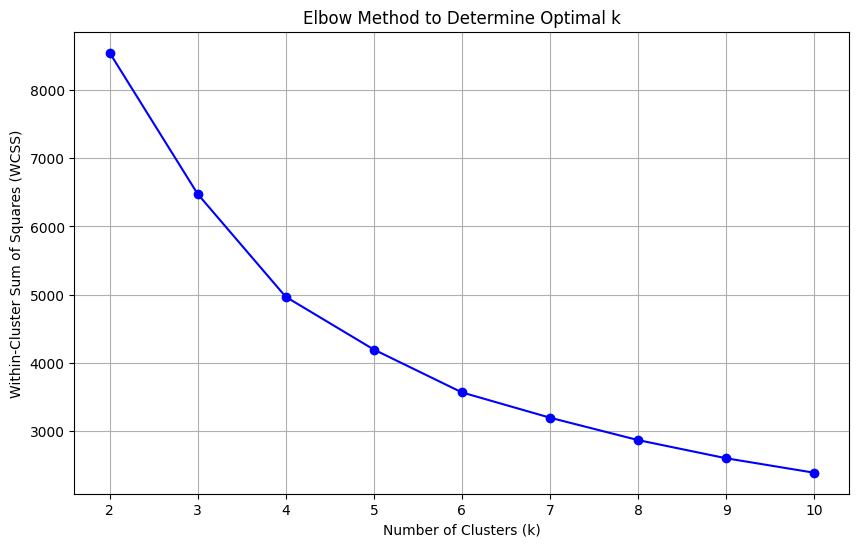

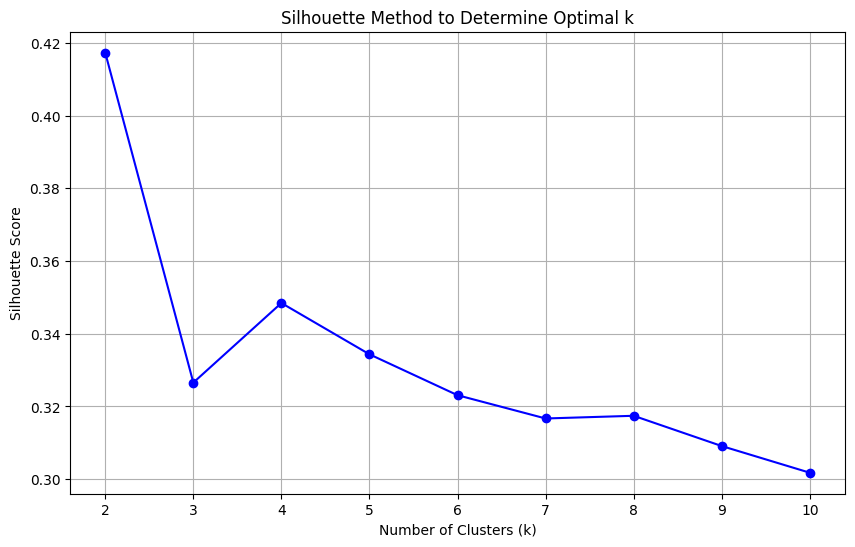

In [609]:
from sklearn.metrics import silhouette_score
# Calculate WCSS for different number of clusters
wcss = []
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS
    sil_scores.append(silhouette_score(rfm, kmeans.labels_))

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Plotting the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method to Determine Optimal k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Since we got maximum silhouette score for 4 clusters, hence we will use that further

In [610]:
model = KMeans(n_clusters=4, random_state=42)

model.fit(rfm)
kmeans_silhouette = silhouette_score(rfm, model.labels_)
print(f"K-means Silhouette Score: {kmeans_silhouette:.3f}")
print('\n\n')
rfm['Cluster'] = model.labels_

print(rfm)

K-means Silhouette Score: 0.348



             Recency  Frequency   Monetary  Cluster
CustomerID                                         
12346.0     5.789960   0.693147  11.253955        2
12347.0     1.098612   2.079442   8.368925        3
12348.0     4.330733   1.609438   7.494564        2
12349.0     2.995732   0.693147   7.472245        2
12350.0     5.739793   0.693147   5.815324        1
...              ...        ...        ...      ...
18280.0     5.631212   0.693147   5.201806        1
18281.0     5.204007   0.693147   4.404522        1
18282.0     2.197225   1.098612   5.187665        0
18283.0     1.609438   2.833213   7.623901        3
18287.0     3.784190   1.386294   7.516586        2

[4338 rows x 4 columns]


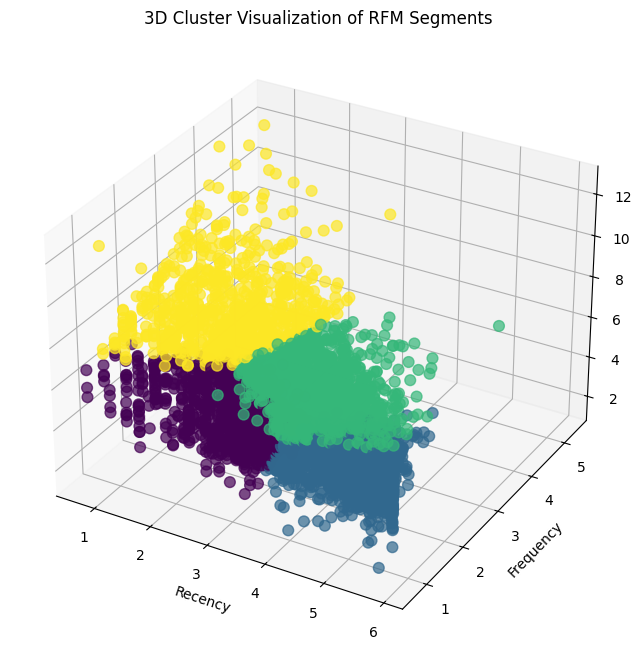

In [611]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', s=60, alpha=0.7)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('3D Cluster Visualization of RFM Segments')
plt.show()

**CLUSTER INTERPRETATION**

In [612]:
cluster_stats = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

# Profile each cluster
for cluster in cluster_stats.index:
    print(f"\nCluster {cluster} Profile:")
    if cluster_stats.loc[cluster, 'Recency'] < cluster_stats['Recency'].mean():
        recency_status = "Recent buyers"
    else:
        recency_status = "Less recent buyers"
        
    if cluster_stats.loc[cluster, 'Frequency'] > cluster_stats['Frequency'].mean():
        frequency_status = "Frequent buyers"
    else:
        frequency_status = "Infrequent buyers"
        
    if cluster_stats.loc[cluster, 'Monetary'] > cluster_stats['Monetary'].mean():
        monetary_status = "High spenders"
    else:
        monetary_status = "Low spenders"
        
    print(f"Characteristics: {recency_status}, {frequency_status}, {monetary_status}")



Cluster 0 Profile:
Characteristics: Recent buyers, Infrequent buyers, Low spenders

Cluster 1 Profile:
Characteristics: Less recent buyers, Infrequent buyers, Low spenders

Cluster 2 Profile:
Characteristics: Less recent buyers, Frequent buyers, High spenders

Cluster 3 Profile:
Characteristics: Recent buyers, Frequent buyers, High spenders


In [613]:
rfm['Cluster'] = rfm['Cluster'].astype(str)
km_map = {
    r'0': 'Recent Infrequent Low Spender',
    r'1': 'Inactive Infrequent Low Spender',
    r'2': 'Inactive Frequent High Spender',
    r'3': 'Active Frequent High Spender',
}

rfm['KMeans_seg_trans'] = rfm['Cluster'].replace(km_map, regex=True)

rfm.head()

,Recency,Frequency,Monetary,Cluster,KMeans_seg_trans
CustomerID,,,,,
12346.0,5.789960,0.693147,11.253955,2,Inactive Frequent High Spender
12347.0,1.098612,2.079442,8.368925,3,Active Frequent High Spender
12348.0,4.330733,1.609438,7.494564,2,Inactive Frequent High Spender
12349.0,2.995732,0.693147,7.472245,2,Inactive Frequent High Spender
12350.0,5.739793,0.693147,5.815324,1,Inactive Infrequent Low Spender
